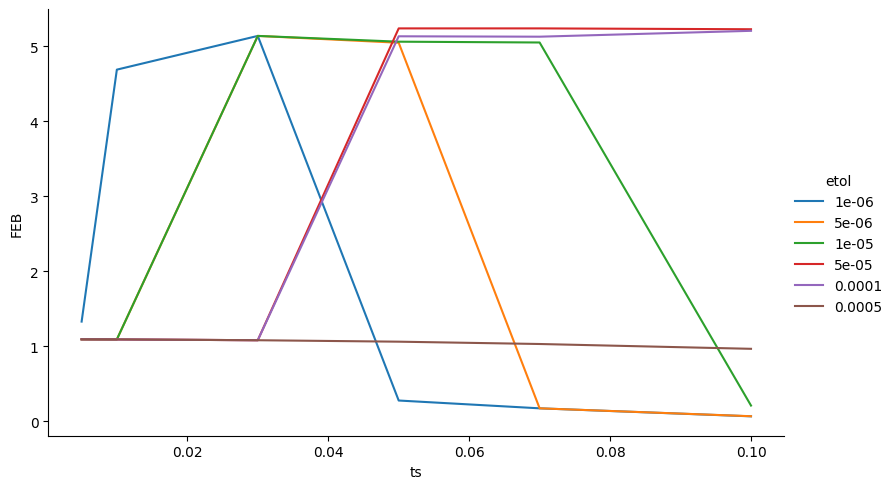

In [35]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas
import seaborn as sns

#seaborn.set(style='ticks')

data = pandas.read_csv("/home/agoga/documents/code/topcon-md/output/NEB/lowEaCSV/4090.csv")

#fig,ax = plt.subplots()
#ax = fig.add_subplot(111, projection='3d')


data=data[data.etol<0.001]
data=data[data.ts<0.11]



sns.relplot(data=data,x="ts",y="FEB",hue="etol", kind="line",aspect=1.61,palette='tab10')#sns.color_palette("Set2"))
# #
# ax.scatter(x, y, c='r', marker='o')
# ax.set_xlabel("Timestep(fs)")
# ax.set_ylabel('Energy Tolerance(kcal/mol)')
# #ax.set_ylabel("Energy Barrier")


In [1]:
from lammps import IPyLammps


L = IPyLammps('mpi')
L.clear()
L.units("real")
L.dimension("3")
L.boundary("p p p")
L.atom_style("charge")
L.variable("dt equal .5")


L.read_data("/home/agoga/documents/code/topcon-md/sandbox/CreateAmorphSiOx-POSS-54141080/SiOx-final-1.data")

L.pair_style("reaxff topcon.control")
L.pair_coeff("* * potential/ffield_Nayir_SiO_2019.reax H O Si")
# #Pair style reaxff requires use of exactly one of the fix qeq/reaxff or fix qeq/shielded or fix acks2/reaxff commands 
L.fix("r1 all qeq/reax 1 0.0 10.0 1e-6 reaxff")

L.neighbor("2 bin")
L.neigh_modify("every 10 delay 0 check yes")


L.timestep("${dt}")
L.thermo("100")

L.thermo_style("custom step time temp density etotal pe press ke vol")

L.dump("d1 all custom 100 jupyter-output/testmin/jupyterwrapper.dump id type q x y z ix iy iz mass element vx vy vz")
L.dump_modify("d1 element H O Si")


L.min_style('hftn')
L.minimize('1.0e-6 1.0e-6 1000 1000')

L.fix("b1 all reaxff/bonds 100 jupyter-output/testmin/bonds.dump")
L.run("100")


LAMMPS (23 Jun 2022)
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (src/comm.cpp:98)
  using 1 OpenMP thread(s) per MPI task
LAMMPS output is captured by PyLammps wrapper


: 

: 

In [ ]:
bondfile ="/home/agoga/topcon/jupyter-output/bonds.dump"
import pandas as pd


df = pd.read_csv(bondfile,delim_whitespace=True,skiprows=7)